In [455]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing the data
df = pd.read_csv('data/raw/medical_insurance_cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [456]:
print(df.shape)

(1338, 7)


In [457]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


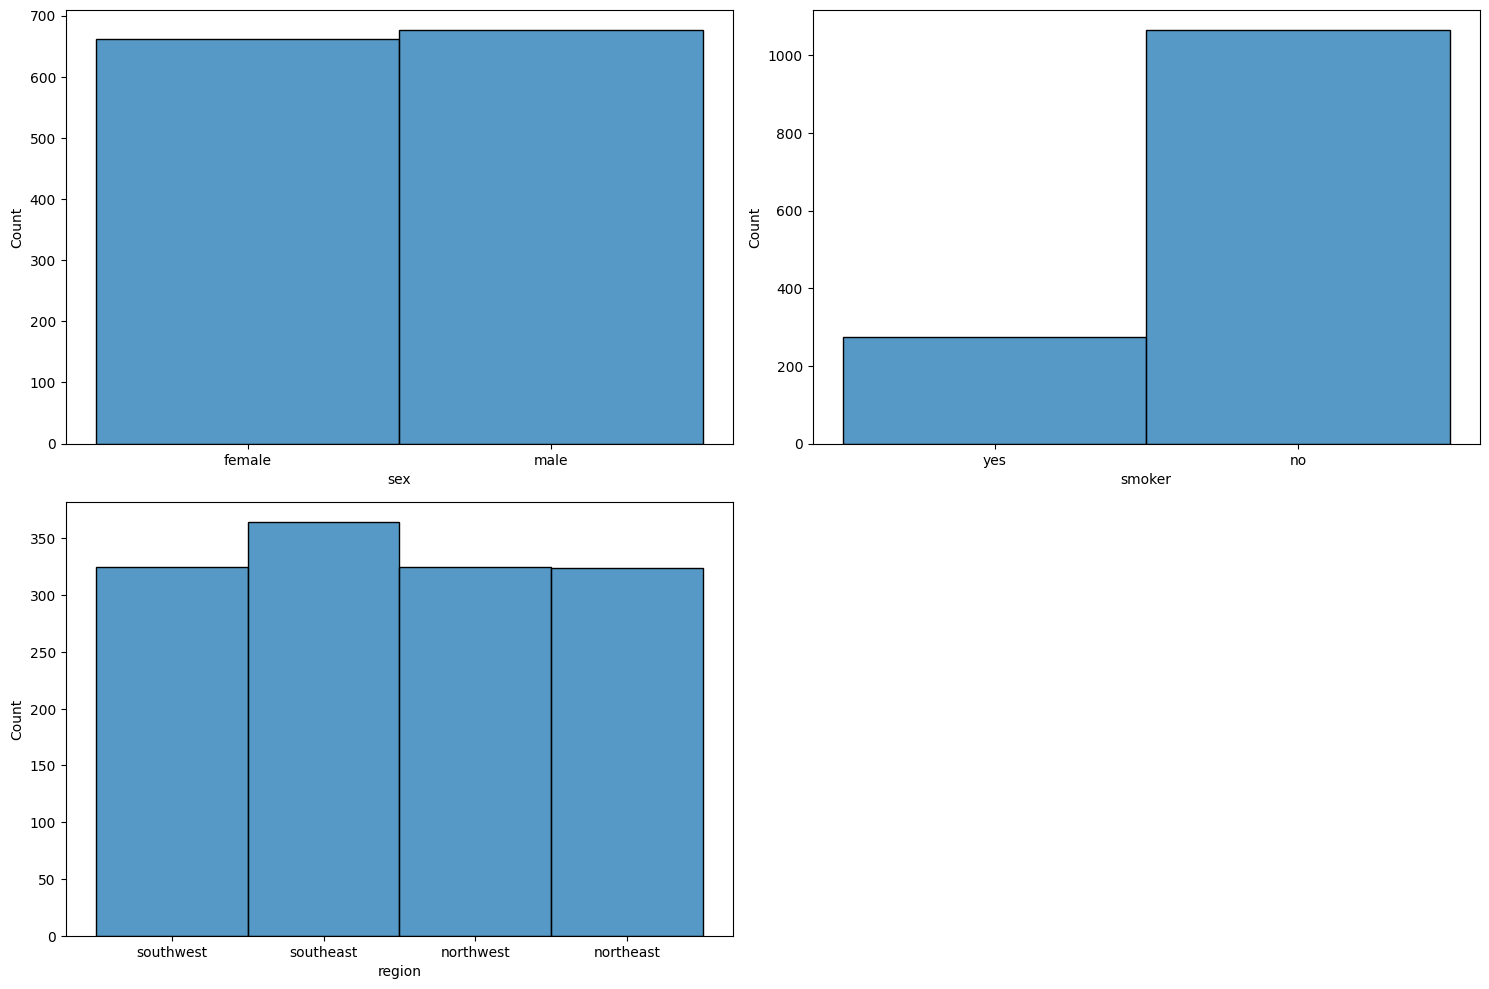

In [458]:
#CATEGORICAL VARIABLES
categoric_variables = ['sex', 'smoker', 'region']

def plot_categoric_analysis(data_frame: pd.DataFrame, column_list: list[str]) -> None:
    num_vars = len(column_list)
    rows = 2
    columns = (num_vars + rows - 1) // rows  # Calculate columns needed
    
    fig, axes = plt.subplots(rows, columns, figsize=(15, 10))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, column in enumerate(column_list):
        print(f"Plotting {column} at position {i}")
        sns.histplot(ax=axes[i], data=data_frame, x=column)
    
    # Hide any unused subplots
    for j in range(num_vars, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_categoric_analysis(df, categoric_variables)

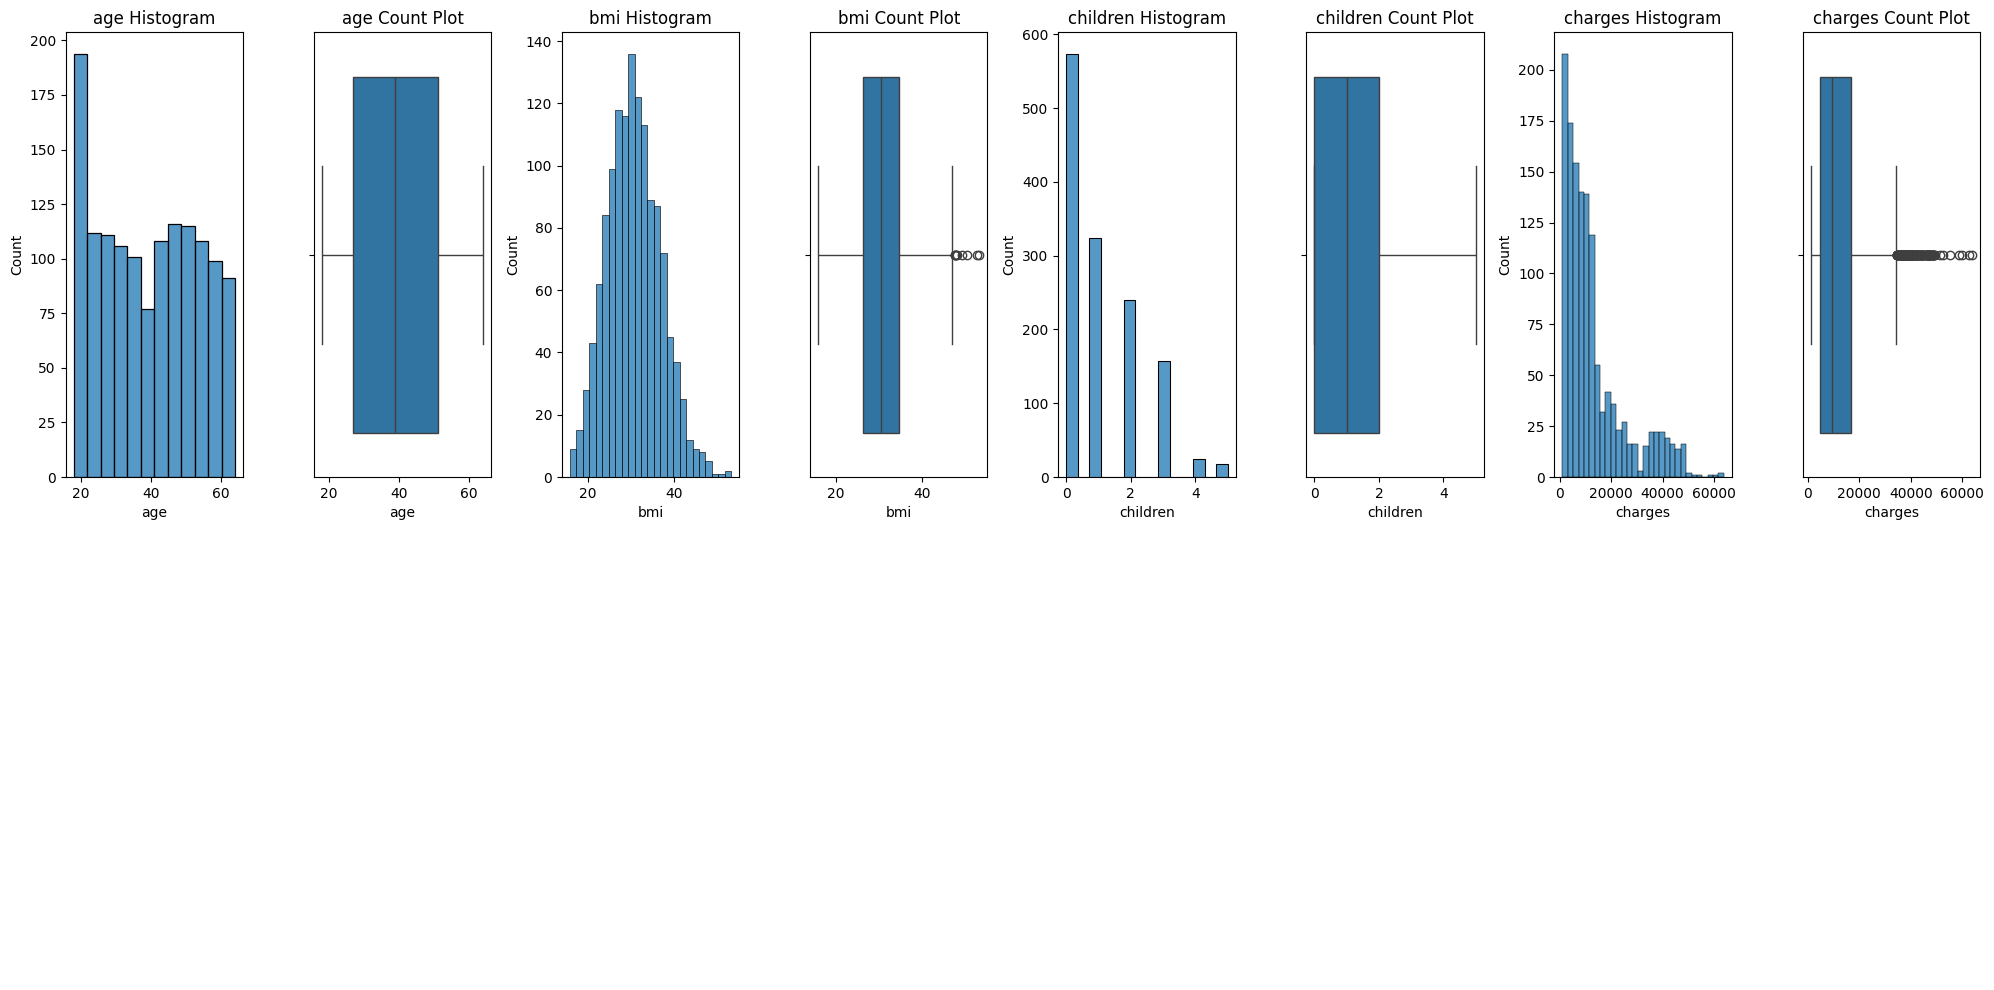

In [459]:
##NUMERIC VARIABLES##
numeric_variables = ['age', 'bmi', 'children', 'charges']

def plot_numeric_analysis(data_frame: pd.DataFrame, column_list: list[str]) -> None:
    num_vars = len(column_list)
    rows = 2
    columns = 2 * num_vars  # Two plots per variable
    
    fig, axes = plt.subplots(rows, columns, figsize=(20, 10))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, column in enumerate(column_list):
        # Histogram
        sns.histplot(ax=axes[2*i], data=data_frame, x=column)
        axes[2*i].set_title(f'{column} Histogram')
        
        # Box plot
        sns.boxplot(ax=axes[2*i + 1], data=data_frame, x=column)
        axes[2*i + 1].set_title(f'{column} Count Plot')
    
    # Hide any unused subplots
    for j in range(2 * num_vars, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_numeric_analysis(df, numeric_variables)

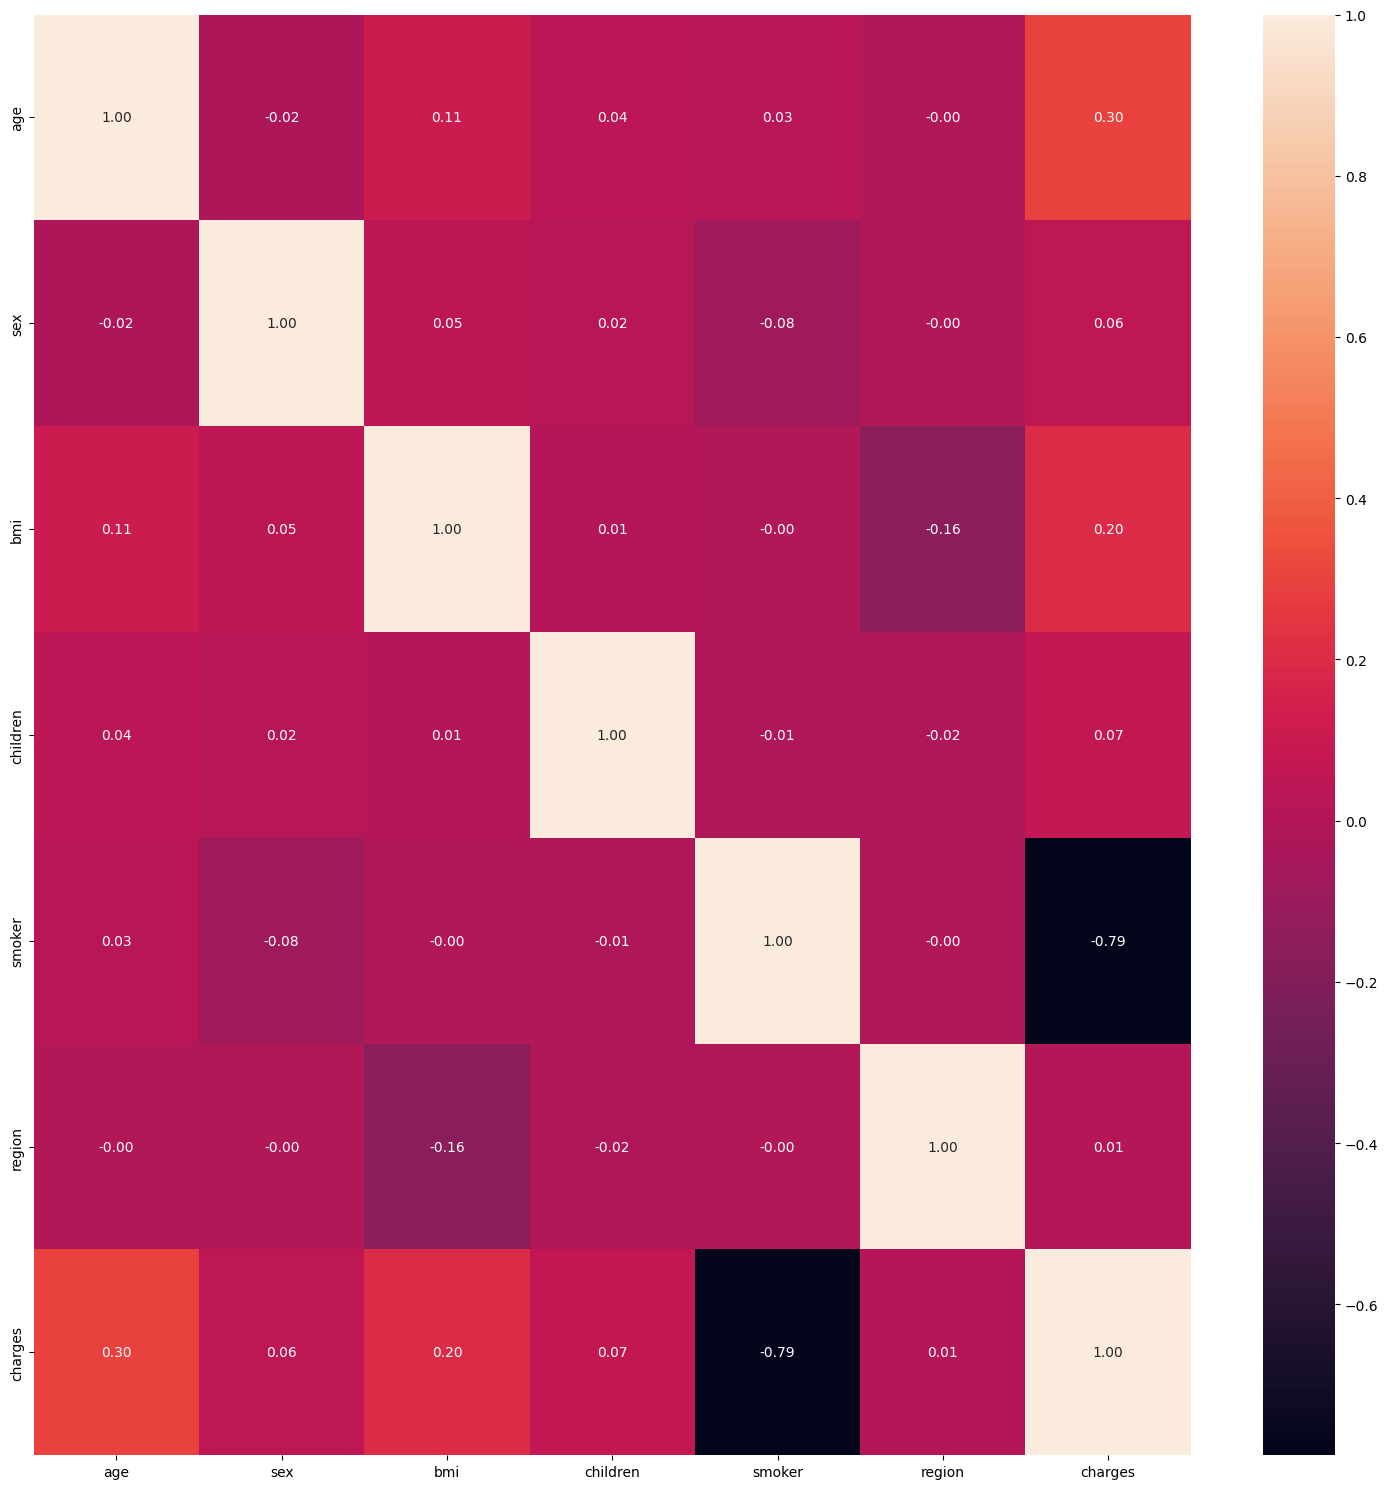

In [460]:
def factorize_data(data_frame : pd.DataFrame, columns : list[str]) -> pd.DataFrame:
    new_df = data_frame
    for col in columns:
        new_df[col] = pd.factorize(df[col])[0]

    return new_df

heatmap_df = factorize_data(df, categoric_variables)

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(heatmap_df[heatmap_df.columns].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

In [461]:
#One Hot Encoding

df = pd.get_dummies(df, columns=categoric_variables,  drop_first=True)
#Excluding numeric columns, factorize the newly encoded values
df = factorize_data(df, [col for col in df.columns if col not in numeric_variables])
df

,age,bmi,children,charges,sex_1,smoker_1,region_1,region_2,region_3
0,19,27.900,0,16884.92400,0,0,0,0,0
1,18,33.770,1,1725.55230,1,1,1,0,0
2,28,33.000,3,4449.46200,1,1,1,0,0
3,33,22.705,0,21984.47061,1,1,0,1,0
4,32,28.880,0,3866.85520,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,1,0
1334,18,31.920,0,2205.98080,0,1,0,0,1
1335,18,36.850,0,1629.83350,0,1,1,0,0
1336,21,25.800,0,2007.94500,0,1,0,0,0


In [462]:
df.describe()

,age,bmi,children,charges,sex_1,smoker_1,region_1,region_2,region_3
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,0.272048,0.242900,0.242152
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.445181,0.428995,0.428546
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [463]:
# Stats for Charges (Outlier analysis)
charges_stats = df["charges"].describe()
charges_stats

def outlier_analysis(column : pd.Series) -> None:
    column_stats = column.describe()

    fare_iqr = column_stats["75%"] - column_stats["25%"]
    upper_limit = column_stats["75%"] + 1.5 * fare_iqr
    lower_limit = column_stats["25%"] - 1.5 * fare_iqr

    print(f"The upper and lower limits for finding outliers in {column.name} are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(fare_iqr, 2)}")

outlier_analysis(df['charges'])
#Elimination of this outliers actually lowers the R2 Score
#df = df[df["charges"] < 45000]
df

The upper and lower limits for finding outliers in charges are 34489.35 and -13109.15, with an interquartile range of 11899.63


,age,bmi,children,charges,sex_1,smoker_1,region_1,region_2,region_3
0,19,27.900,0,16884.92400,0,0,0,0,0
1,18,33.770,1,1725.55230,1,1,1,0,0
2,28,33.000,3,4449.46200,1,1,1,0,0
3,33,22.705,0,21984.47061,1,1,0,1,0
4,32,28.880,0,3866.85520,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,0,1,0
1334,18,31.920,0,2205.98080,0,1,0,0,1
1335,18,36.850,0,1629.83350,0,1,1,0,0
1336,21,25.800,0,2007.94500,0,1,0,0,0


In [464]:
#Null Values
df.isnull().sum().sort_values(ascending = False)

age         0
bmi         0
children    0
charges     0
sex_1       0
smoker_1    0
region_1    0
region_2    0
region_3    0
dtype: int64

In [465]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled["charges"] = df["charges"]

print(df_scaled)

           age       bmi  children      charges  sex_1  smoker_1  region_1  \
0     0.021739  0.321227       0.0  16884.92400    0.0       0.0       0.0   
1     0.000000  0.479150       0.2   1725.55230    1.0       1.0       1.0   
2     0.217391  0.458434       0.6   4449.46200    1.0       1.0       1.0   
3     0.326087  0.181464       0.0  21984.47061    1.0       1.0       0.0   
4     0.304348  0.347592       0.0   3866.85520    1.0       1.0       0.0   
...        ...       ...       ...          ...    ...       ...       ...   
1333  0.695652  0.403820       0.6  10600.54830    1.0       1.0       0.0   
1334  0.000000  0.429379       0.0   2205.98080    0.0       1.0       0.0   
1335  0.000000  0.562012       0.0   1629.83350    0.0       1.0       1.0   
1336  0.065217  0.264730       0.0   2007.94500    0.0       1.0       0.0   
1337  0.934783  0.352704       0.0  29141.36030    0.0       0.0       0.0   

      region_2  region_3  
0          0.0       0.0  
1        

In [466]:
#Splitting the data
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples
df_scaled = df_scaled.dropna()
X = df_scaled.drop("charges", axis = 1)
y = df_scaled["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [467]:
#Feature selection
#Less than 4 features results in a lower R2 Score while adding more than 4 shows no improvement
X_train_sel = X_train[[ "age","bmi","children", "smoker_1"]]
X_test_sel = X_test[[ "age","bmi","children", "smoker_1"]]

X_train_sel.head()

,age,bmi,children,smoker_1
560,0.608696,0.107345,0.4,1.0
1285,0.630435,0.224913,0.0,1.0
1142,0.739130,0.239440,0.0,1.0
969,0.456522,0.493947,1.0,1.0
486,0.782609,0.148238,0.6,1.0


In [468]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)
X_train_sel.to_csv("data/clean/clean_train.csv", index = False)
X_test_sel.to_csv("data/clean/clean_test.csv", index = False)

/tmp/ipykernel_7624/733032598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_sel["charges"] = list(y_train)
/tmp/ipykernel_7624/733032598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_sel["charges"] = list(y_test)


## Linear Regression Model

In [469]:
train_data = pd.read_csv("data/clean/clean_train.csv")
test_data = pd.read_csv("data/clean/clean_test.csv")

x_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
x_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

x_train.head(10)

,age,bmi,children,smoker_1
0,0.608696,0.107345,0.4,1.0
1,0.630435,0.224913,0.0,1.0
2,0.739130,0.239440,0.0,1.0
3,0.456522,0.493947,1.0,1.0
4,0.782609,0.148238,0.6,1.0
5,0.978261,0.686306,0.0,1.0
6,0.086957,0.224374,0.0,1.0
7,0.000000,0.150794,0.0,0.0
8,0.478261,0.679849,0.2,1.0
9,0.413043,0.490718,0.2,0.0


In [470]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(x_train, y_train)

print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 21390.678607575144
Coefficients (b1, b2): [ 11825.27326582  12174.01619773   2135.99985473 -23653.21164629]


In [471]:
#Prediction
y_pred = model.predict(x_test)
y_pred

array([ 8550.90921341,  6969.71599759, 36794.13661808,  9421.86824203,
       26875.01095777, 11101.26514111,   141.44896605, 16750.22436643,
         743.78364016, 11157.63586446, 28521.42342227,  9296.15962897,
        5456.5831315 , 38513.59317763, 40362.63211366, 37226.61219261,
       15312.47750251, 36042.83494384,  9322.40796481, 31395.64230108,
        4273.49461256, 10468.62243337,  2723.96491222,  6575.5287315 ,
       11228.01912269, 12468.20703945, 14803.23875441,  6062.13408867,
        9531.77127863,  2381.73787018,  9470.9842188 , 12959.38866372,
        4702.13338911,  3410.73606761,  4819.65393639, 12488.16536441,
        2355.2166747 ,  9157.11135848, 33234.15784494, 32746.69484389,
        4270.42403098,  4233.52485656, 14431.41993531, 11388.84943272,
        8929.60714179, 12484.19557109,  5150.40526844,  3550.1037231 ,
       35652.7853174 ,  9280.12457197, 15967.47938558,  2556.74541518,
       12158.95859481,  1066.73450634, 13555.51395976, 12107.63444981,
      

In [472]:
#Performance
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 33981653.95019776
R2 Score: 0.7811147722517886
